In [75]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cse256/assignments/PA2/'
FOLDERNAME = None
FOLDERNAME = 'CSE256PAs/Analysis Study'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

# This is later used to use the IMDB reviews
%cd /content/drive/My\ Drive/$FOLDERNAME/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/CSE256PAs/Analysis Study


In [2]:
!pip install transformers
!pip install pandas
!pip install numpy
!pip install sympy
!pip install torch
!pip install openai==0.28

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import openai
# assign variable value with your OpenAI key to continue
openai.api_key = ''

In [ ]:
!curl https://api.openai.com/v1/models \
  -H "Authorization: Bearer $openai.api_key"

{
  "object": "list",
  "data": [
    {
      "id": "dall-e-3",
      "object": "model",
      "created": 1698785189,
      "owned_by": "system"
    },
    {
      "id": "gpt-4-1106-preview",
      "object": "model",
      "created": 1698957206,
      "owned_by": "system"
    },
    {
      "id": "whisper-1",
      "object": "model",
      "created": 1677532384,
      "owned_by": "openai-internal"
    },
    {
      "id": "gpt-4-0613",
      "object": "model",
      "created": 1686588896,
      "owned_by": "openai"
    },
    {
      "id": "davinci-002",
      "object": "model",
      "created": 1692634301,
      "owned_by": "system"
    },
    {
      "id": "gpt-4",
      "object": "model",
      "created": 1687882411,
      "owned_by": "openai"
    },
    {
      "id": "babbage-002",
      "object": "model",
      "created": 1692634615,
      "owned_by": "system"
    },
    {
      "id": "dall-e-2",
      "object": "model",
      "created": 1698798177,
      "owned_by": "system"
    

In [30]:
import pandas as pd
import numpy as np
from sympy import *
import time
import random

# GPT-3.5
def generate_3_5(s):
    completion = openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=[{
            "role": 'user',
            "content": s
        }],
        temperature=0.7
    )
    return completion.choices[0].message.content

# GPT-4
def generate_4(s):
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{
            "role": 'user',
            "content": s
        }],
        temperature=0.7)
    return response.choices[0].message.content

###1 Question Classification

In [ ]:
df50 = pd.read_excel('L50.xlsx', header=None)
df50 = df50[[0,2]]
df50 = df50.rename(columns={0: "Question", 2: "Category"})
df50['GPT-3.5'] = ''
df50['GPT-4'] = ''

# Model Answers
for index, row in df50.iterrows():
    s = row['Question']+'\nWhich type of question does the above one belong to?\nA. Sum and Difference\
    \nB. Item and Property\nC. Perimeter of Rectangles\nD. Motion\nE. Mixture'
    df50.loc[index, 'GPT-3.5'] = generate_3_5(s)
    df50.loc[index, 'GPT-4'] = generate_4(s)

# save results
df50.to_excel("L50_Classification.xlsx",index=False)


In [ ]:
df50

,Question,Category,GPT-3.5,GPT-4
0,An airplane flying with the wind can cover a c...,motion,D. Motion\n\nThis question involves calculatin...,D. Motion
1,It takes a boat 2 hours to travel 24 miles dow...,motion,D. Motion\n\nThe question involves calculating...,D. Motion
2,An executive traveled a total of 4 hours and 8...,motion,D. Motion,D. Motion
3,"Flying with the wind, a light aircraft travele...",motion,D. Motion,D. Motion
4,Joe spends 1 hour each morning exercising by j...,motion,D. Motion,D. Motion
5,Swimming with the current Jack can swim 2.5 mi...,motion,D. Motion\n\nThe question deals with Jack's sp...,D. Motion
6,How many gallons of 20% alcohol solution and 5...,mixture,"E. Mixture\n\nTo solve this problem, we can se...",E. Mixture
7,A 1.8% saline solution is to be combined and m...,mixture,E. Mixture,E. Mixture
8,A customer ordered 4 pounds of a mixed peanut ...,mixture,E. Mixture,E. Mixture
9,Pure sugar is to be mixed with a fruit salad c...,mixture,"E. Mixture\n\nTo solve this problem, we can se...",E. Mixture


In [14]:
import pandas as pd
df = pd.read_excel('L50_Classification.xlsx')

In [19]:
# Convert Category and GPT-3.5 columns to lowercase
df['Category_lower'] = df['Category'].str.lower()
df['GPT-3.5_lower'] = df['GPT-3.5'].str.lower()

# Check if Category is in GPT-3.5
df['match'] = df.apply(lambda row: row['Category_lower'] in row['GPT-3.5_lower'], axis=1)

# Calculate overall accuracy
total_accuracy = df['match'].mean()

# Calculate accuracy per category
category_accuracy = df.groupby('Category')['match'].mean()

# Convert Category and GPT-4 columns to lowercase
df['GPT-4_lower'] = df['GPT-4'].str.lower()

# Check if Category is in GPT-4
df['match_gpt4'] = df.apply(lambda row: row['Category_lower'] in row['GPT-4_lower'], axis=1)

# Calculate overall accuracy for GPT-4
total_accuracy_gpt4 = df['match_gpt4'].mean()

# Calculate accuracy per category for GPT-4
category_accuracy_gpt4 = df.groupby('Category')['match_gpt4'].mean()

print('GPT-3.5 total accuracy:', total_accuracy, 'category accuracy:', category_accuracy )

print('GPT-4 total accuracy:', total_accuracy_gpt4,'category accuracy:', category_accuracy_gpt4)


GPT-3.5 total accuracy: 0.78 category accuracy: Category
item and property         0.0
mixture                   1.0
motion                    1.0
perimeter of rectangle    1.0
sum and difference        0.9
Name: match, dtype: float64
GPT-4 total accuracy: 0.78 category accuracy: Category
item and property         0.5
mixture                   0.6
motion                    1.0
perimeter of rectangle    1.0
sum and difference        0.8
Name: match_gpt4, dtype: float64


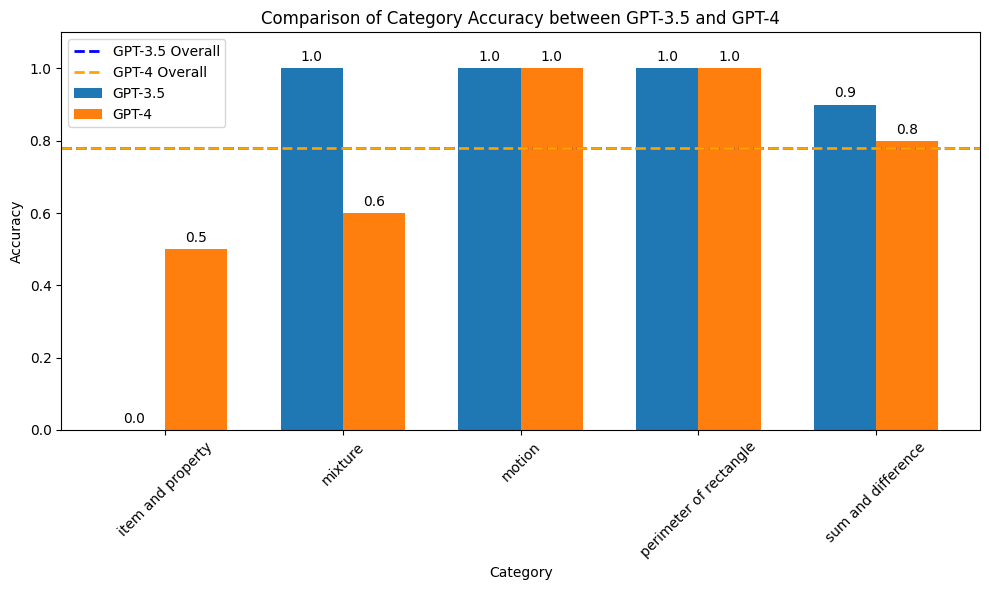

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data for plotting
categories = list(category_accuracy.index)
accuracy_gpt3 = category_accuracy.tolist()
accuracy_gpt4 = category_accuracy_gpt4.tolist()

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracy_gpt3, width, label='GPT-3.5')
rects2 = ax.bar(x + width/2, accuracy_gpt4, width, label='GPT-4')

# Add overall accuracy as horizontal lines
ax.axhline(y=total_accuracy, color='blue', linestyle='--', linewidth=2, label='GPT-3.5 Overall')
ax.axhline(y=total_accuracy_gpt4, color='orange', linestyle='--', linewidth=2, label='GPT-4 Overall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Category')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Category Accuracy between GPT-3.5 and GPT-4')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

# Annotate bars with their heights
def annotate_bars(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(rects1)
annotate_bars(rects2)

fig.tight_layout()

plt.ylim(0, 1.1)
plt.show()

###2 Equation Extraction

In [41]:
# define variables
x = symbols("x")
y = symbols("y")
sym = " -> "

In [42]:
import re
# calculate accuracy of extracted equations
def acc_calculation(ans_df):
    corr_num = 0
    for i in range(len(ans_df)):
        # check if generated answer contains 2 equations and no characters other than x, y, digits and operators
        ans = ans_df.iloc[i, 1].replace(" ","")
        ans = ans.replace("\n","")
        ans = ans.rstrip('.')
        ans = ans.replace("^","**").split(";")
        invalid_char = re.findall(r'[^\^xy0-9=+-/\*;\(\) ]+', ans_df.iloc[i, 1])
        if "," in ans_df.iloc[i, 1]:
            continue
        elif len(ans)!=2 or len(invalid_char)!=0:
            continue
        elif ans[1] == "":
            continue
        # proceed with valid answers
        # filling in asterisks
        temp = re.findall(r'[xy]|\d|[=+-/\*\(\)]', ans[0])
        j = 1
        while j<len(temp):
            if temp[j] == "x" or temp[j] == "y" or temp[j] == "(":
                if temp[j-1].isdigit() or temp[j-1] == ")" or temp[j-1] == "x" or temp[j-1] == "y":
                    temp.insert(j,"*")
                if temp[j-1] == ".":
                    temp.insert(j,"0*")
            elif temp[j].isdigit() and temp[j-1] == ")":
                temp.insert(j,"*")
            if temp[j] == "." and j+1 == len(temp):
                temp.pop(j)
            j +=1
        first = "".join(temp).split("=")
        j = 1
        temp = re.findall(r'[xy]|\d|[=+-/\*\(\)]', ans[1])
        while j<len(temp):
            if temp[j] == "x" or temp[j] == "y" or temp[j] == "(":
                if temp[j-1].isdigit() or temp[j-1] == ")" or temp[j-1] == "x" or temp[j-1] == "y":
                    temp.insert(j,"*")
                if temp[j-1] == ".":
                    temp.insert(j,"0*")
            elif temp[j].isdigit() and temp[j-1] == ")":
                temp.insert(j,"*")
            if temp[j] == "." and j+1 == len(temp):
                temp.pop(j)
            j +=1
        second = "".join(temp).split("=")
        if "" in first or "" in second:
            continue
        # create equations
        eq1 = Eq(eval(first[0]),eval(first[1]),evaluate=False)
        eq2 = Eq(eval(second[0]),eval(second[1]),evaluate=False)
        reference = ans_df.iloc[i, 0].split(";")
        one = reference[0].split("=")
        two = reference[1].split("=")
        ref1 = Eq(eval(one[0]),eval(one[1]),evaluate=False)
        ref2 = Eq(eval(two[0]),eval(two[1]),evaluate=False)
        # check if the model switched variables for representation
        temp = re.findall(r'[xy]|\d|[=+-/\*\(\)]', "=".join([first[0],first[1]]))
        k=0
        while k<len(temp):
            if temp[k] == "x":
                temp[k] = "y"
            elif temp[k] == "y":
                temp[k] = "x"
            k += 1
        sub1 = "".join(temp).split("=")
        temp = re.findall(r'[xy]|\d|[=+-/\*\(\)]', "=".join([second[0],second[1]]))
        k=0
        while k<len(temp):
            if temp[k] == "x":
                temp[k] = "y"
            elif temp[k] == "y":
                temp[k] = "x"
            k += 1
        sub2 = "".join(temp).split("=")
        se1 = Eq(eval(sub1[0]),eval(sub1[1]),evaluate=False)
        se2 = Eq(eval(sub2[0]),eval(sub2[1]),evaluate=False)
        # compare equations
        if solve(eq1)==solve(ref1) and solve(eq2)==solve(ref2):
            corr_num += 1
        elif solve(eq1)==solve(ref2) and solve(eq2)==solve(ref1):
            corr_num += 1
        elif solve(se1)==solve(ref1) and solve(se2)==solve(ref2):
            corr_num += 1
        elif solve(se1)==solve(ref2) and solve(se2)==solve(ref1):
            corr_num += 1
    return(corr_num/len(ans_df))

####2.1 Zero-shot Learning

In [ ]:
df100 = pd.read_excel('L100.xlsx', header=None)
df100 = df100.rename(columns={0: "Question", 1: "Answer", 2: "Category"})
df100['GPT-3.5'] = ''
df100['GPT-4'] = ''

In [ ]:
# zero-shot 3.5
for index, row in df100.iterrows():
    s = 'Extract a system of two linear equations in terms of x and y from the following question. \
    Separate the equations with a semicolon.Do not explain what x and y represent, try solve the problem, \
    or add any explanations.\nQuestion: '+row['Question']+'\nEquations:'
    df100.loc[index, 'GPT-3.5'] = generate_3_5(s)
    time.sleep(0.2)

In [ ]:
# Total Accuracy GPT-3.5
print(acc_calculation(df100[['Answer', 'GPT-3.5']]))

0.41


In [ ]:
# Accuracy by category GPT-3.5
for name, group in df100.groupby('Category'):
    print(name)
    print(acc_calculation(group[['Answer', 'GPT-3.5']]))

item and property
0.55
mixture
0.45
motion
0.4
perimeter of rectangle
0.4
sum and difference
0.25


In [ ]:
# zero-shot 4
for index, row in df100.iterrows():
    s = 'Extract a system of two linear equations in terms of x and y from the following question. \
    Separate the equations with a semicolon.Do not explain what x and y represent, try solve the problem, \
    or add any explanations. \nQuestion: '+row['Question']+'\nEquations:'
    df100.loc[index, 'GPT-4'] = generate_4(s)
    time.sleep(0.2)

In [ ]:
# Total Accuracy GPT-4
print(acc_calculation(df100[['Answer', 'GPT-4']]))

0.59


In [ ]:
# Accuracy by category GPT-4
for name, group in df100.groupby('Category'):
    print(name)
    print(acc_calculation(group[['Answer', 'GPT-4']]))

item and property
0.6
mixture
0.85
motion
0.5
perimeter of rectangle
0.5
sum and difference
0.5


In [ ]:
df100.to_excel("ZeroShot.xlsx",index=False)

In [ ]:
df100

,Question,Answer,Category,GPT-3.5,GPT-4
0,A multiple choice test consists of 100 questio...,y+x=100;2*y-x=80,item and property,2x - y = 80; \nx + y = 100,2x - y = 80; x + y = 100
1,A multiple choice test consists of 100 questio...,y+x=100;1*y-0*x=78,item and property,x + y = 100; \nx - y = 78,x + y = 100; x - y = 78
2,A multiple choice test consists of 102 questio...,y+x=102;0*y-0*x=81,item and property,x + y = 102; -x + y = 81,x + y = 102; 0x - y = 81
3,A multiple choice test consists of 103 questio...,y+x=103;2*y-3*x=79,item and property,2x - 3y = 79; x + y = 103,2x - 3y = 79; x + y = 103
4,A multiple choice test consists of 101 questio...,y+x=101;5*y-(-1)*x=80,item and property,5x - y = 80; \nx + y = 101,5x - y = 80; x + y = 101
...,...,...,...,...,...
95,In a two digit number. The units digit is thri...,x=3*y;10*y+x+36=10*x+y,sum and difference,3x - y = 0; 10y + x + 36 = 10x + y,y = 3x; 10y + x + 36 = 10x + y
96,In a two digit number. The units digit is thri...,x=3*y;10*y+x+34=10*x+y,sum and difference,3x - y = 0; 10y + x + 34 = 10x + y,y = 3x; 10y + x + 34 = 10x + y
97,In a two digit number. The units digit is twic...,x=2*y;10*y+x+38=10*x+y,sum and difference,10x + y = n\n10y + x + 38 = n,y = 2x; 10y + x + 38 = 10x + y
98,In a two digit number. The units digit is thri...,x=3*y;10*y+x+39=10*x+y,sum and difference,3x - y = 0; 10y + x - 39 = 10x + y,y = 3x; 10y + x + 39 = 10x + y


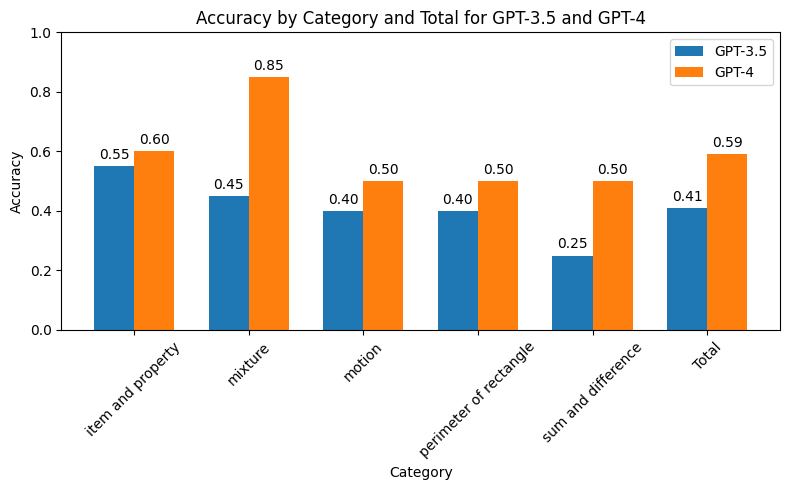

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from the screenshots
categories = ["item and property", "mixture", "motion", "perimeter of rectangle", "sum and difference"]
accuracy_gpt3_5 = [0.55, 0.45, 0.4, 0.4, 0.25]
accuracy_gpt4 = [0.6, 0.85, 0.5, 0.5, 0.5]
total_accuracy_gpt3_5 = 0.41
total_accuracy_gpt4 = 0.59

# Extend categories to include total accuracy
categories_extended = categories + ["Total"]

# Extend accuracies to include total accuracy
accuracy_gpt3_5_extended = accuracy_gpt3_5 + [total_accuracy_gpt3_5]
accuracy_gpt4_extended = accuracy_gpt4 + [total_accuracy_gpt4]

# Create a dataframe
df = pd.DataFrame({
    "Category": categories_extended,
    "GPT-3.5": accuracy_gpt3_5_extended,
    "GPT-4": accuracy_gpt4_extended
})

# Plotting
plt.figure(figsize=(8, 5))
bar_width = 0.35
index = np.arange(len(categories_extended))

bar1 = plt.bar(index, df["GPT-3.5"], bar_width, label='GPT-3.5')
bar2 = plt.bar(index + bar_width, df["GPT-4"], bar_width, label='GPT-4')

plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.title('Accuracy by Category and Total for GPT-3.5 and GPT-4')
plt.xticks(index + bar_width / 2, categories_extended, rotation=45)
plt.ylim(0, 1.0)
plt.legend()

# Annotate bars with their heights
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('%.2f' % height,
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

annotate_bars(bar1)
annotate_bars(bar2)

plt.tight_layout()
plt.show()


####2.2 Few-shot Learning

In [63]:
df100 = pd.read_excel('L100.xlsx', header=None)
df100 = df100.rename(columns={0: "Question", 1: "Answer", 2: "Category"})
df100['GPT-3.5'] = ''
df100['GPT-4'] = ''

In [64]:
# examples.xlsx contains examples we used
qs = pd.read_excel('examples.xlsx')

# create the prompt
n = 5 # n is the number of examples giving to models, change value for different settings
s = "Extract a system of two linear equations in terms of x and y from the last question, like in the given examples. \
    Do not explain what x and y represent, try solve the problem, or add any explanations. \
    Do not use any other characters to represent the variables.\n"
for i in range(n):
    s = s+str(i+1)+'. '+qs.iloc[i,0]+sym+qs.iloc[i,1]+'\n'
s = s+str(n+1)+'. '

In [65]:
# GPT-3.5
for index, row in df100.iterrows():
    resp = generate_3_5(s+row['Question']+sym)
    df100.loc[index, 'GPT-3.5'] = resp.replace("\n", "")
    time.sleep(0.2)

In [71]:
# GPT-4
for index, row in df100.iterrows():
    resp = generate_4(s+row['Question']+sym)
    df100.loc[index, 'GPT-4'] = resp.replace("\n", "")
    time.sleep(0.2)

In [72]:
df100.to_excel("FewShot.xlsx",index=False)

In [77]:
# Total Accuracy GPT-3.5
print(acc_calculation(df100[['Answer', 'GPT-3.5']]))

0.48


In [78]:
# Accuracy by category GPT-3.5
for name, group in df100.groupby('Category'):
    print(name)
    print(acc_calculation(group[['Answer', 'GPT-3.5']]))

item and property
0.75
mixture
0.3
motion
0.3
perimeter of rectangle
0.6
sum and difference
0.45


In [79]:
# Total Accuracy GPT-4
print(acc_calculation(df100[['Answer', 'GPT-4']]))

0.74


In [80]:
# Accuracy by category GPT-4
for name, group in df100.groupby('Category'):
    print(name)
    print(acc_calculation(group[['Answer', 'GPT-4']]))

item and property
0.7
mixture
0.75
motion
0.5
perimeter of rectangle
1.0
sum and difference
0.75


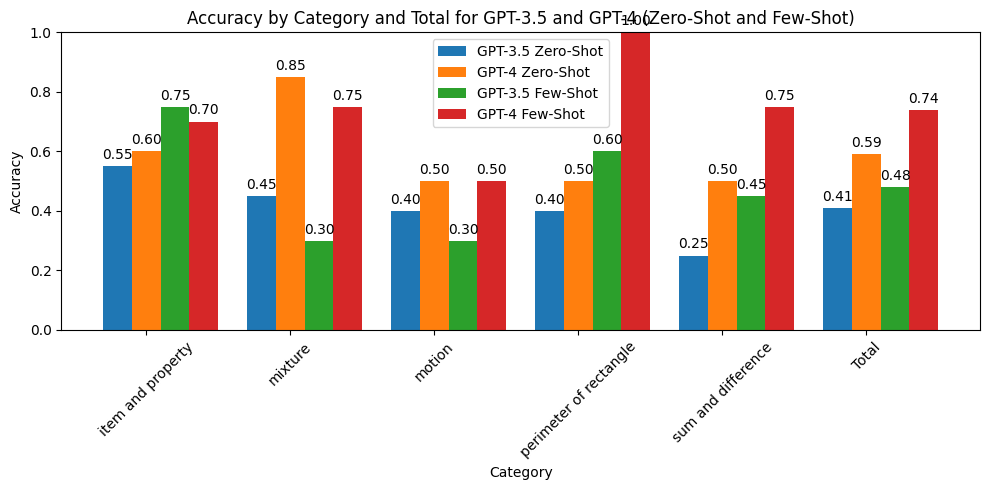

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data for few-shot learning
categories = ["item and property", "mixture", "motion", "perimeter of rectangle", "sum and difference"]
accuracy_gpt3_5_zero_shot = [0.55, 0.45, 0.4, 0.4, 0.25]
accuracy_gpt4_zero_shot = [0.6, 0.85, 0.5, 0.5, 0.5]
total_accuracy_gpt3_5_zero_shot = 0.41
total_accuracy_gpt4_zero_shot = 0.59

accuracy_gpt3_5_few_shot = [0.75, 0.3, 0.3, 0.6, 0.45]
accuracy_gpt4_few_shot = [0.7, 0.75, 0.5, 1.0, 0.75]
total_accuracy_gpt3_5_few_shot = 0.48
total_accuracy_gpt4_few_shot = 0.74

# Extend categories to include total accuracy
categories_extended = categories + ["Total"]

# Extend accuracies to include total accuracy
accuracy_gpt3_5_zero_shot_extended = accuracy_gpt3_5_zero_shot + [total_accuracy_gpt3_5_zero_shot]
accuracy_gpt4_zero_shot_extended = accuracy_gpt4_zero_shot + [total_accuracy_gpt4_zero_shot]
accuracy_gpt3_5_few_shot_extended = accuracy_gpt3_5_few_shot + [total_accuracy_gpt3_5_few_shot]
accuracy_gpt4_few_shot_extended = accuracy_gpt4_few_shot + [total_accuracy_gpt4_few_shot]

# Create dataframes
df_zero_shot = pd.DataFrame({
    "Category": categories_extended,
    "GPT-3.5 Zero-Shot": accuracy_gpt3_5_zero_shot_extended,
    "GPT-4 Zero-Shot": accuracy_gpt4_zero_shot_extended
})

df_few_shot = pd.DataFrame({
    "Category": categories_extended,
    "GPT-3.5 Few-Shot": accuracy_gpt3_5_few_shot_extended,
    "GPT-4 Few-Shot": accuracy_gpt4_few_shot_extended
})

# Plotting
plt.figure(figsize=(10, 5))

# Bar plot for zero-shot accuracy
bar_width = 0.2
index = np.arange(len(categories_extended))

bar1 = plt.bar(index - bar_width, df_zero_shot["GPT-3.5 Zero-Shot"], bar_width, label='GPT-3.5 Zero-Shot')
bar2 = plt.bar(index, df_zero_shot["GPT-4 Zero-Shot"], bar_width, label='GPT-4 Zero-Shot')
bar3 = plt.bar(index + bar_width, df_few_shot["GPT-3.5 Few-Shot"], bar_width, label='GPT-3.5 Few-Shot')
bar4 = plt.bar(index + 2 * bar_width, df_few_shot["GPT-4 Few-Shot"], bar_width, label='GPT-4 Few-Shot')

plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.title('Accuracy by Category and Total for GPT-3.5 and GPT-4 (Zero-Shot and Few-Shot)')
plt.xticks(index, categories_extended, rotation=45)
plt.ylim(0, 1.0)
plt.legend()

# Annotate bars with their heights
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('%.2f' % height,
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

annotate_bars(bar1)
annotate_bars(bar2)
annotate_bars(bar3)
annotate_bars(bar4)

plt.tight_layout()
plt.show()

###3 Question Generation

####3.1 Within Topic

In [ ]:
ans = pd.DataFrame(columns=['Question', 'Category', 'Topic', 'GPT-3.5', 'GPT-4'])

In [ ]:
qs = pd.read_excel("WTQ.xlsx")

In [ ]:
qs

,Category,Topic,Question
0,item and property,"money (funds, bills, stocks, etc.)",Dante has 27 coins that are all dimes and quar...
1,item and property,solid items,Ms. Kitts works at a music store. Last week sh...
2,item and property,"money (funds, bills, stocks, etc.)",Your family goes to a restaurant for dinner. T...
3,mixture,liquids,A paint that contains 21% green dye is mixed w...
4,mixture,solid items,A candy mix sells for $2.20 per kilogram. It c...
5,mixture,solid items,A lumber company combined oak wood chips that ...
6,motion,moving objects,Ava’s family drove to Disney Land for spring b...
7,motion,moving objects,A boat traveled 210 miles downstream and back....
8,motion,moving objects,Two cyclists start from the same point and rid...
9,perimeter of rectangle,rectangular objects,The perimeter of a rectangle is 34 centimeter....


In [ ]:
# GPT-3.5
for index, row in qs.iterrows():
    for i in range(0,5):
        s = row['Question']+'Given the above question, use different values to write a similar question \
        statement about '+row['Topic']+'. Don\'t try to solve problem. Don\'t repeat the original statement.'
        if i==0:
          ans.loc[len(ans)] = [row['Question'], row['Category'], row['Topic'], generate_3_5(s), '']
        else:
          ans.loc[len(ans)] = ['', '', '', generate_3_5(s), '']
        time.sleep(0.2)

# GPT-4
for index, row in qs.iterrows():
    for i in range(0,5):
        s = row['Question']+'Given the above question, use different values to write a similar question \
        statement about '+row['Topic']+'. Don\'t try to solve problem. Don\'t repeat the original statement.'
        ans.loc[index, 'GPT-4'] = generate_4(s)
        index += 1

ans.to_excel('WTG.xlsx', index=False)

In [ ]:
ans

,Question,Category,Topic,GPT-3.5,GPT-4
0,Dante has 27 coins that are all dimes and quar...,item and property,"money (funds, bills, stocks, etc.)",Samantha has 45 bills that are all $5 and $10....,George has 35 coins that are all nickels and d...
1,,,,Samantha has 50 bills that are all fives and t...,Mr. Johnson works at a hardware store. Last mo...
2,,,,Samantha has 45 bills that are all $5 and $10 ...,Your investment group decides to split their f...
3,,,,"Sarah has $82 in her wallet, consisting of $5 ...",A juice that contains 30% orange concentrate i...
4,,,,Samantha has 50 bills that are all $5 and $10 ...,A metal alloy sells for $50 per kilogram. It c...
...,...,...,...,...,...
70,The larger of two numbers is 11 more than twic...,sum and difference,numbers,The difference between two numbers is 8 and th...,
71,,,,The difference between two numbers is 5 and th...,
72,,,,The difference between two numbers is 5. The s...,
73,,,,The smaller of two numbers is 5 less than thre...,


####3.2 Cross Topic

In [ ]:
# randomly draw questions from L200 as within-topic generation, but need to manually add a column of reasonable new topics
# or use ours
ct = pd.read_excel("CTQ.xlsx")
gens = pd.DataFrame(columns=['Question', 'Category', 'Topic', 'NewTopic', 'GPT-3.5', 'GPT-4'])

In [ ]:
# GPT-3.5
for index, row in ct.iterrows():
    for i in range(0,5):
        s = row['Question']+'Given the above question, use different values to write a similar question \
        about '+row['NewTopic']+'. Don\'t try to solve problem. Don\'t repeat the original statement. \
        The new question should still pertain to a system of two equations.'
        if i ==0:
            gens.loc[len(gens)] = [row['Question'], row['Category'], row['Topic'], row['NewTopic'], generate_3_5(s), '']
        else:
            gens.loc[len(gens)] = ['', '', '', '', generate_3_5(s), '']
        time.sleep(0.2)

# GPT-4
for index, row in ct.iterrows():
    for i in range(0,5):
        s = row['Question']+'Given the above question, use different values to write a similar question \
        about '+row['NewTopic']+'. Don\'t try to solve problem. Don\'t repeat the original statement. \
        The new question should still pertain to a system of two equations.'
        if i ==0:
            gens.loc[len(gens)] = [row['Question'], row['Category'], row['Topic'], row['NewTopic'], '', generate_4(s)]
        else:
            gens.loc[len(gens)] = ['', '', '', '', '', generate_4(s)]
        index += 1

gens.to_excel('CTG.xlsx', index=False)

In [ ]:
gens

,Question,Category,Topic,NewTopic,GPT-3.5,GPT-4
0,At a restaurant the cost for a breakfast taco ...,Item and Property,solid items,"money (funds, bills, stocks, etc.)","At a clothing store, the cost for a pair of je...",
1,,,,,"At a clothing store, the cost for a t-shirt an...",
2,,,,,At a store the cost for a notebook and a pack ...,
3,,,,,"At a clothing store, the cost for a t-shirt an...",
4,,,,,"At a grocery store, the cost for 3 apples and ...",
...,...,...,...,...,...,...
135,The combined average weight of an okapi and a ...,sum and difference,weights,"geometry (length, width, perimeter, etc.)",,The combined length of a rectangle and a squar...
136,,,,,,The combined average length of a rectangle and...
137,,,,,,The combined average length of a rectangle and...
138,,,,,,The combined average length of a rectangle and...
